In [1]:
!pip install torch torchvision scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 52.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 90.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

# **MNIST loading**

In [2]:
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

#1. Transformations: Resize to 224x224 and Normalize values
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)) # Grayscale normalization (single channel)
])

#2. Load training and test data
train_dataset = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

test_dataset = torchvision.datasets.MNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform
)

# 3. creat DataLoaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

print(" MNIST data has been successfully uploaded and prepared")

100%|██████████| 9.91M/9.91M [00:00<00:00, 14.3MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 487kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.88MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.04MB/s]

 MNIST data has been successfully uploaded and prepared


# **Load resnet_mnist.pth (already trained)**

In [3]:
import torch
import torch.nn as nn
from torchvision.models import resnet18

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load ResNet18 with 1 input channel (grayscale MNIST)
model = resnet18(weights=None)
model.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
model.fc = nn.Linear(512, 10)

# Load trained weights
model.load_state_dict(torch.load("resnet_mnist.pth", map_location=device))
model = model.to(device)
model.eval()

ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [4]:
# Save trained model as resnet_mnist.pth
torch.save(model.state_dict(), "resnet_mnist.pth")


# FGSM **ATTACK**

 The model has been uploaded successfully.


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model evaluation on FGSM images:
 Accuracy:  0.0100
 Precision: 0.5000
 Recall:    0.0050
 F1 Score:  0.0099


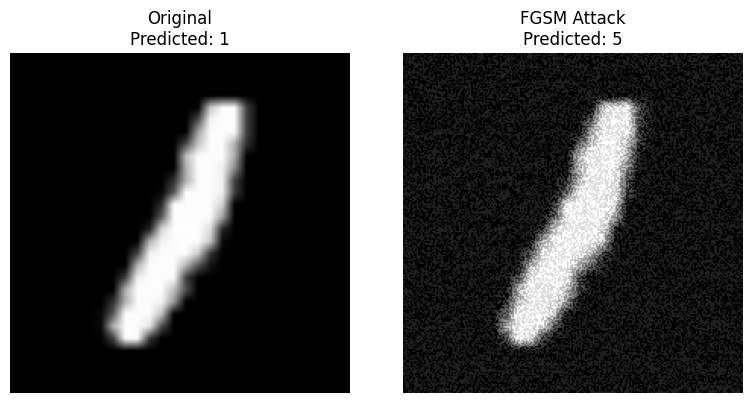

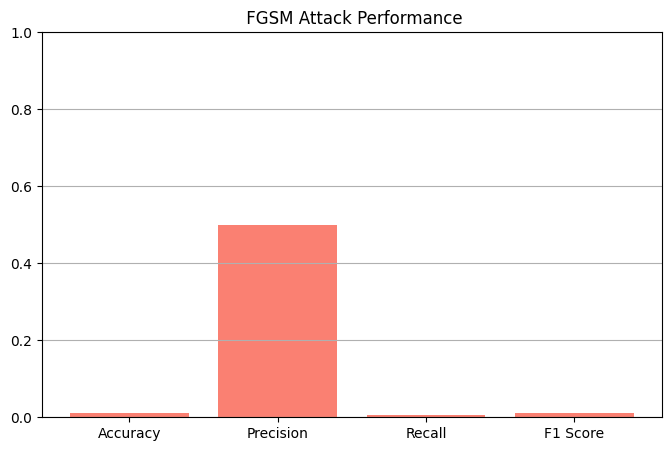

In [5]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
from torchvision.models import ResNet18_Weights
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# ============ 1. Device and Model Preparation ============
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = models.resnet18(weights=None)
model.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
model.fc = nn.Linear(model.fc.in_features, 10)
model = model.to(device)

model.load_state_dict(torch.load("resnet_mnist.pth", map_location=device))
model.eval()
print(" The model has been uploaded successfully.")

# ============ 2. Load MNIST Test Data ============
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1, shuffle=True)

# ============ 3. Define FGSM Attack ============
def fgsm_attack(image, epsilon, gradient):
    perturbed = image + epsilon * gradient.sign()
    perturbed = torch.clamp(perturbed, -1, 1)
    return perturbed

epsilon = 0.25
adv_preds, true_labels = [], []
original_img, adv_img = None, None
original_pred_label, adv_pred_label = None, None

for i, (image, label) in enumerate(test_loader):
    image, label = image.to(device), label.to(device)
    image.requires_grad = True

    output = model(image)
    init_pred = output.max(1, keepdim=True)[1]

    if init_pred.item() != label.item():
        continue

    loss = nn.CrossEntropyLoss()(output, label)
    model.zero_grad()
    loss.backward()

    gradient = image.grad.data
    adv_image = fgsm_attack(image, epsilon, gradient)

    adv_output = model(adv_image)
    final_pred = adv_output.max(1, keepdim=True)[1]

    adv_preds.append(final_pred.item())
    true_labels.append(label.item())

    if original_img is None:
        original_img = image.squeeze().detach().cpu().numpy()
        adv_img = adv_image.squeeze().detach().cpu().numpy()
        original_pred_label = init_pred.item()
        adv_pred_label = final_pred.item()

    if len(adv_preds) >= 100:
        break

# ============ 4. Evaluation ============
acc = accuracy_score(true_labels, adv_preds)
prec = precision_score(true_labels, adv_preds, average='macro')
rec = recall_score(true_labels, adv_preds, average='macro')
f1 = f1_score(true_labels, adv_preds, average='macro')

print("Model evaluation on FGSM images:")
print(f" Accuracy:  {acc:.4f}")
print(f" Precision: {prec:.4f}")
print(f" Recall:    {rec:.4f}")
print(f" F1 Score:  {f1:.4f}")

# ============ 5. View images with predictions ============
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

axs[0].imshow(original_img, cmap="gray")
axs[0].set_title(f"Original\nPredicted: {original_pred_label}")
axs[0].axis("off")

axs[1].imshow(adv_img, cmap="gray")
axs[1].set_title(f"FGSM Attack\nPredicted: {adv_pred_label}")
axs[1].axis("off")

plt.tight_layout()
plt.show()

# ============ 6. Performance Drawing =============
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [acc, prec, rec, f1]

plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color='salmon')
plt.title(" FGSM Attack Performance")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()


### **Gaussian Noise** **texte en gras**


 FGSM + Gaussian Noise Evaluation:
 Accuracy:  0.3100
 Precision: 0.5000
 Recall:    0.1550
 F1 Score:  0.2366


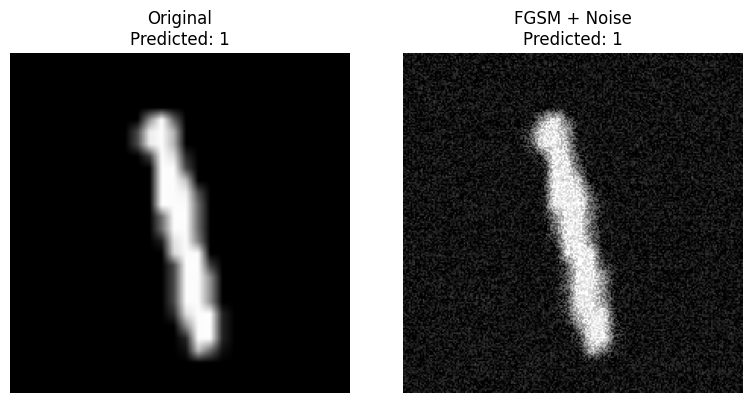

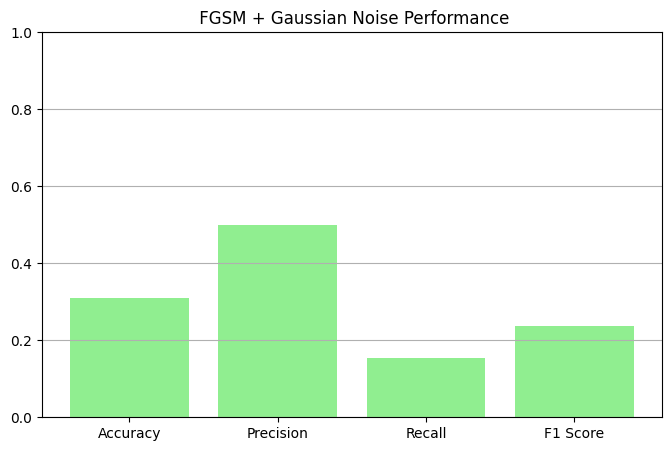

In [16]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# ============ 1. Device and model setup ============
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = models.resnet18(weights=None)
model.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
model.fc = nn.Linear(model.fc.in_features, 10)
model = model.to(device)
model.load_state_dict(torch.load("resnet_mnist.pth", map_location=device))
model.eval()

# ============ 2. Load MNIST Test Data ============
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1, shuffle=True)

# ============ 3. FGSM + Gaussian Noise ============
def fgsm_attack(image, epsilon, gradient):
    return torch.clamp(image + epsilon * gradient.sign(), -1, 1)

def apply_gaussian_noise(image, std=0.1):
    noise = torch.randn_like(image) * std
    return torch.clamp(image + noise, -1, 1)

epsilon = 0.25
adv_preds, true_labels = [], []
original_img, defended_img = None, None
original_pred_label, defended_pred_label = None, None

for i, (image, label) in enumerate(test_loader):
    image, label = image.to(device), label.to(device)
    image.requires_grad = True

    output = model(image)
    if output.max(1)[1].item() != label.item():
        continue

    loss = nn.CrossEntropyLoss()(output, label)
    model.zero_grad()
    loss.backward()
    gradient = image.grad.data

    x_adv = fgsm_attack(image, epsilon, gradient)
    x_defended = apply_gaussian_noise(x_adv, std=0.1)

    output_def = model(x_defended)
    pred = output_def.max(1)[1].item()

    adv_preds.append(pred)
    true_labels.append(label.item())

    if original_img is None:
        original_img = image.squeeze().detach().cpu().numpy()
        defended_img = x_defended.squeeze().detach().cpu().numpy()
        original_pred_label = output.max(1)[1].item()
        defended_pred_label = pred

    if len(adv_preds) >= 100:
        break

# ============ 4. Performance Evaluation ============
acc = accuracy_score(true_labels, adv_preds)
prec = precision_score(true_labels, adv_preds, average='macro', zero_division=0)
rec = recall_score(true_labels, adv_preds, average='macro', zero_division=0)
f1 = f1_score(true_labels, adv_preds, average='macro', zero_division=0)

print("\n FGSM + Gaussian Noise Evaluation:")
print(f" Accuracy:  {acc:.4f}")
print(f" Precision: {prec:.4f}")
print(f" Recall:    {rec:.4f}")
print(f" F1 Score:  {f1:.4f}")

# ============ 5. Display Prediction Images ============
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

axs[0].imshow(original_img, cmap="gray")
axs[0].set_title(f"Original\nPredicted: {original_pred_label}")
axs[0].axis("off")

axs[1].imshow(defended_img, cmap="gray")
axs[1].set_title(f"FGSM + Noise\nPredicted: {defended_pred_label}")
axs[1].axis("off")

plt.tight_layout()
plt.show()

# ============ 6. Bar Chart ============
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [acc, prec, rec, f1]

plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color='lightgreen')
plt.title(" FGSM + Gaussian Noise Performance")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()


# **Bit Depth defense**


 تقييم FGSM + Bit Depth Reduction:
 Accuracy:  1.0000
 Precision: 1.0000
 Recall:    1.0000
 F1 Score:  1.0000


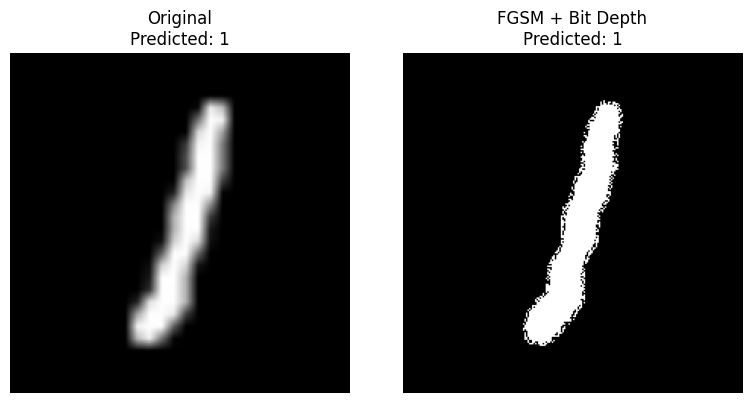

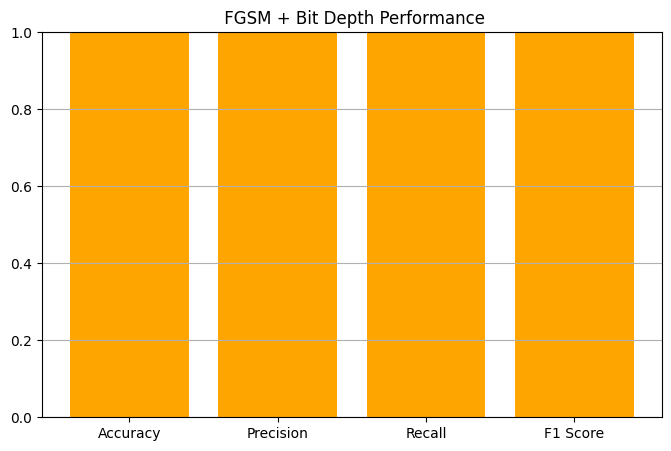

In [17]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# ============ 1. Device and model setup ============
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = models.resnet18(weights=None)
model.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
model.fc = nn.Linear(model.fc.in_features, 10)
model = model.to(device)
model.load_state_dict(torch.load("resnet_mnist.pth", map_location=device))
model.eval()

# ============ 2. Load MNIST Test Data ============
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1, shuffle=True)

# ============ 3. FGSM + Bit Depth Reduction ============
def fgsm_attack(image, epsilon, gradient):
    return torch.clamp(image + epsilon * gradient.sign(), -1, 1)

def apply_bit_depth_reduction(image, levels=2):
    x = (image + 1) / 2  # [-1,1] → [0,1]
    x_quant = torch.round(x * (levels - 1)) / (levels - 1)
    x_quant = x_quant * 2 - 1  # back to [-1,1]
    return x_quant

epsilon = 0.25
adv_preds, true_labels = [], []
original_img, defended_img = None, None
original_pred_label, defended_pred_label = None, None

for i, (image, label) in enumerate(test_loader):
    image, label = image.to(device), label.to(device)
    image.requires_grad = True

    output = model(image)
    if output.max(1)[1].item() != label.item():
        continue

    original_pred_label = output.max(1)[1].item()

    loss = nn.CrossEntropyLoss()(output, label)
    model.zero_grad()
    loss.backward()
    gradient = image.grad.data

    x_adv = fgsm_attack(image, epsilon, gradient)
    x_defended = apply_bit_depth_reduction(x_adv, levels=2)

    output_def = model(x_defended)
    defended_pred_label = output_def.max(1)[1].item()

    adv_preds.append(defended_pred_label)
    true_labels.append(label.item())

    if original_img is None:
        original_img = image.squeeze().detach().cpu().numpy()
        defended_img = x_defended.squeeze().detach().cpu().numpy()

    if len(adv_preds) >= 100:
        break

# ============ 4. Performance Evaluation ============
acc = accuracy_score(true_labels, adv_preds)
prec = precision_score(true_labels, adv_preds, average='macro', zero_division=0)
rec = recall_score(true_labels, adv_preds, average='macro', zero_division=0)
f1 = f1_score(true_labels, adv_preds, average='macro', zero_division=0)

print("\n تقييم FGSM + Bit Depth Reduction:")
print(f" Accuracy:  {acc:.4f}")
print(f" Precision: {prec:.4f}")
print(f" Recall:    {rec:.4f}")
print(f" F1 Score:  {f1:.4f}")

# ============ 5. Display Images with Predictions ============
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

axs[0].imshow(original_img, cmap="gray")
axs[0].set_title(f"Original\nPredicted: {original_pred_label}")
axs[0].axis("off")

axs[1].imshow(defended_img, cmap="gray")
axs[1].set_title(f"FGSM + Bit Depth\nPredicted: {defended_pred_label}")
axs[1].axis("off")

plt.tight_layout()
plt.show()

# ============ 6. Bar Chart ============
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [acc, prec, rec, f1]

plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color='orange')
plt.title(" FGSM + Bit Depth Performance")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()


## Gaussian Blur **Defense** **texte en gras**


 تقييم FGSM + Gaussian Blur:
 Accuracy:  1.0000
 Precision: 1.0000
 Recall:    1.0000
 F1 Score:  1.0000


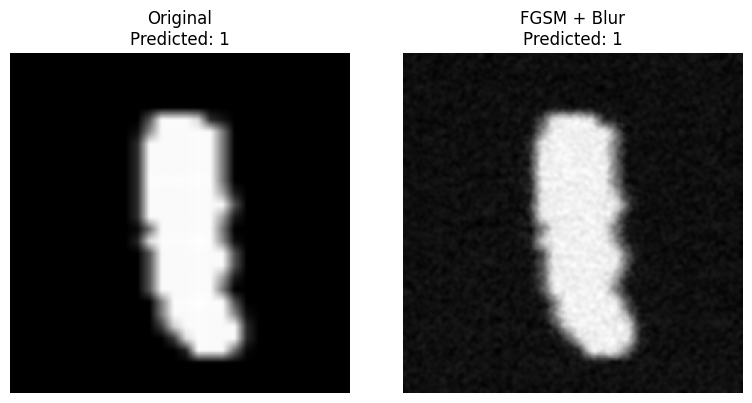

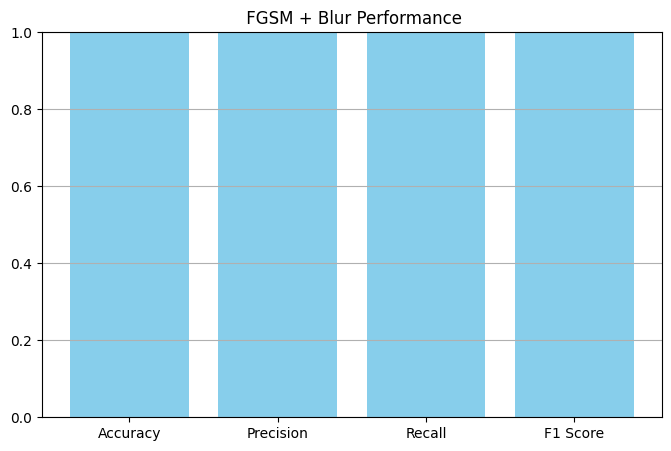

In [18]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import cv2
import numpy as np

# ============ 1. Device and Model Preparation ============
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = models.resnet18(weights=None)
model.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
model.fc = nn.Linear(model.fc.in_features, 10)
model = model.to(device)
model.load_state_dict(torch.load("resnet_mnist.pth", map_location=device))
model.eval()

# ============ 2. Download MNIST data ============
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1, shuffle=True)

# ============ 3. FGSM + Gaussian Blur ============
def fgsm_attack(image, epsilon, gradient):
    return torch.clamp(image + epsilon * gradient.sign(), -1, 1)

def apply_gaussian_blur(image_tensor, kernel_size=5):
    img = image_tensor.squeeze().detach().cpu().numpy()
    img = (img + 1) / 2  # [-1, 1] → [0, 1]
    img = (img * 255).astype(np.uint8)

    blurred = cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)
    blurred = blurred.astype(np.float32) / 255
    blurred = (blurred * 2) - 1  # back to [-1, 1]
    return torch.tensor(blurred).unsqueeze(0).to(device)

epsilon = 0.25
adv_preds, true_labels = [], []
original_img, defended_img = None, None
original_pred_label, defended_pred_label = None, None

for i, (image, label) in enumerate(test_loader):
    image, label = image.to(device), label.to(device)
    image.requires_grad = True

    output = model(image)
    original_pred_label = output.max(1)[1].item()

    if original_pred_label != label.item():
        continue

    loss = nn.CrossEntropyLoss()(output, label)
    model.zero_grad()
    loss.backward()
    gradient = image.grad.data

    x_adv = fgsm_attack(image, epsilon, gradient)
    x_defended = apply_gaussian_blur(x_adv)

    output_def = model(x_defended.unsqueeze(0))
    defended_pred_label = output_def.max(1)[1].item()

    adv_preds.append(defended_pred_label)
    true_labels.append(label.item())

    if original_img is None:
        original_img = image.squeeze().detach().cpu().numpy()
        defended_img = x_defended.squeeze().detach().cpu().numpy()

    if len(adv_preds) >= 100:
        break

# ============ 4. Evaluation ============
acc = accuracy_score(true_labels, adv_preds)
prec = precision_score(true_labels, adv_preds, average='macro', zero_division=0)
rec = recall_score(true_labels, adv_preds, average='macro', zero_division=0)
f1 = f1_score(true_labels, adv_preds, average='macro', zero_division=0)

print("\n تقييم FGSM + Gaussian Blur:")
print(f" Accuracy:  {acc:.4f}")
print(f" Precision: {prec:.4f}")
print(f" Recall:    {rec:.4f}")
print(f" F1 Score:  {f1:.4f}")

# ============ 5. Display Images with Predictions ============
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

axs[0].imshow(original_img, cmap="gray")
axs[0].set_title(f"Original\nPredicted: {original_pred_label}")
axs[0].axis("off")

axs[1].imshow(defended_img, cmap="gray")
axs[1].set_title(f"FGSM + Blur\nPredicted: {defended_pred_label}")
axs[1].axis("off")

plt.tight_layout()
plt.show()

# ============ 6. Bar Chart ============
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [acc, prec, rec, f1]

plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color='skyblue')
plt.title(" FGSM + Blur Performance")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()



# Adversarial Training FGSM* **texte en gras**

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
from torch.utils.data import DataLoader

# ============ 1. Data Preparation ============
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=2)

# ============ 2. Model Setup ============
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = models.resnet18(weights=None)
model.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
model.fc = nn.Linear(model.fc.in_features, 10)
model = model.to(device)

# ============ 3. FGSM Function ============
def fgsm_attack(image, epsilon, gradient):
    return torch.clamp(image + epsilon * gradient.sign(), -1, 1)

# ============ 4. Training Loop (Clean + Adversarial) ============
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
epochs = 20
epsilon = 0.25

print("🛡️ Starting Adversarial Training (FGSM)...\n")
for epoch in range(epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        images.requires_grad = True

        # Forward on clean
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward to get gradient
        model.zero_grad()
        loss.backward()
        gradient = images.grad.data

        # Generate adversarial examples
        adv_images = fgsm_attack(images.detach(), epsilon, gradient)

        # Combine clean and adversarial
        mixed_images = torch.cat([images.detach(), adv_images], dim=0)
        mixed_labels = torch.cat([labels, labels], dim=0)

        # Train on both
        optimizer.zero_grad()
        mixed_outputs = model(mixed_images)
        mixed_loss = criterion(mixed_outputs, mixed_labels)
        mixed_loss.backward()
        optimizer.step()

        running_loss += mixed_loss.item()

    print(f"Epoch {epoch+1}/{epochs} - Loss: {running_loss / len(train_loader):.4f}")

# ============ 5. Save Model ============
torch.save(model.state_dict(), "resnet_advtrained.pth")
print("\n Adversarially trained model saved to 'resnet_advtrained.pth'")

🛡️ Starting Adversarial Training (FGSM)...

Epoch 1/20 - Loss: 0.1404
Epoch 2/20 - Loss: 0.0186
Epoch 3/20 - Loss: 0.0161
Epoch 4/20 - Loss: 0.0097
Epoch 5/20 - Loss: 0.0115
Epoch 6/20 - Loss: 0.0082
Epoch 7/20 - Loss: 0.0183
Epoch 8/20 - Loss: 0.0101
Epoch 9/20 - Loss: 0.0058
Epoch 10/20 - Loss: 0.0051
Epoch 11/20 - Loss: 0.0038
Epoch 12/20 - Loss: 0.0165
Epoch 13/20 - Loss: 0.0111
Epoch 14/20 - Loss: 0.0033
Epoch 15/20 - Loss: 0.0025
Epoch 16/20 - Loss: 0.0028
Epoch 17/20 - Loss: 0.0077
Epoch 18/20 - Loss: 0.0023
Epoch 19/20 - Loss: 0.0075
Epoch 20/20 - Loss: 0.0019

 Adversarially trained model saved to 'resnet_advtrained.pth'


In [7]:
torch.save(model.state_dict(), "resnet_advtrained.pth")

# JPEG Compression **Defense**


 FGSM + JPEG Compression Evaluation (Improved):
 Accuracy:  0.7800
 Precision: 0.5000
 Recall:    0.3900
 F1 Score:  0.4382


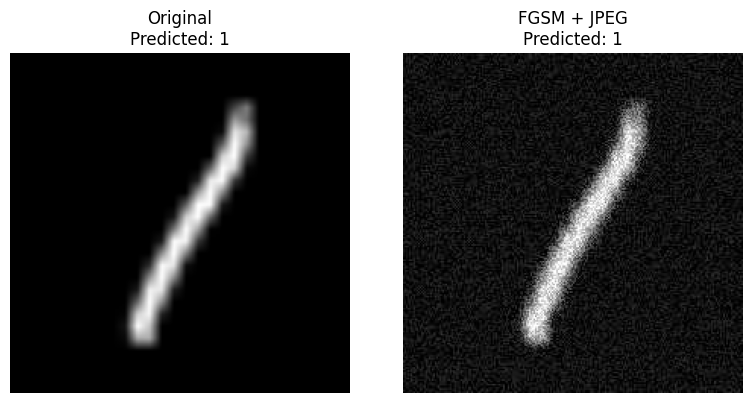

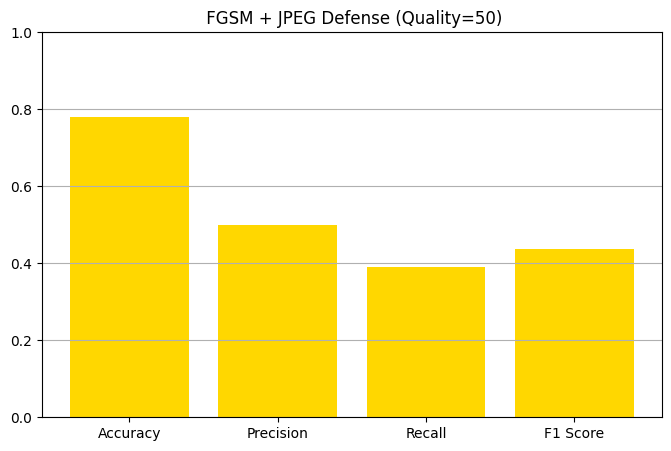

In [8]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from PIL import Image
import io

# ============ 1. Device & Model ============
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = models.resnet18(weights=None)
model.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
model.fc = nn.Linear(model.fc.in_features, 10)
model.load_state_dict(torch.load("resnet_mnist.pth", map_location=device))
model = model.to(device)
model.eval()

# ============ 2. Load MNIST Test Data ============
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1, shuffle=True)

# ============ 3. FGSM Function ============
def fgsm_attack(image, epsilon, gradient):
    perturbed = image + epsilon * gradient.sign()
    return torch.clamp(perturbed, -1, 1)

# ============ 4. JPEG Compression Function ============
def jpeg_defense(image_tensor, quality=50):
    image_denorm = image_tensor.clone().detach().cpu().squeeze()  # [0,1] scale
    image_denorm = (image_denorm + 1) / 2  # [-1,1] → [0,1]

    pil_img = transforms.ToPILImage()(image_denorm)
    buffer = io.BytesIO()
    pil_img.save(buffer, format="JPEG", quality=quality)
    buffer.seek(0)

    jpeg_img = Image.open(buffer)
    tensor_out = transforms.ToTensor()(jpeg_img).unsqueeze(0).to(device)
    tensor_out = torch.clamp(tensor_out * 2 - 1, -1, 1)  # back to [-1,1]
    return tensor_out

# ============ 5. Run Evaluation ============
epsilon = 0.25
adv_preds, true_labels = [], []
original_img, defended_img = None, None
original_pred_label, defended_pred_label = None, None

for i, (image, label) in enumerate(test_loader):
    image, label = image.to(device), label.to(device)
    image.requires_grad = True

    output = model(image)
    original_pred_label = output.max(1)[1].item()

    if original_pred_label != label.item():
        continue

    loss = nn.CrossEntropyLoss()(output, label)
    model.zero_grad()
    loss.backward()
    gradient = image.grad.data

    x_adv = fgsm_attack(image, epsilon, gradient)
    x_defended = jpeg_defense(x_adv, quality=50)

    output_def = model(x_defended)
    defended_pred_label = output_def.max(1)[1].item()

    adv_preds.append(defended_pred_label)
    true_labels.append(label.item())

    if original_img is None:
        original_img = image.squeeze().detach().cpu().numpy()
        defended_img = x_defended.squeeze().detach().cpu().numpy()

    if len(adv_preds) >= 100:
        break

# ============ 6. Metrics ============
acc = accuracy_score(true_labels, adv_preds)
prec = precision_score(true_labels, adv_preds, average='macro', zero_division=0)
rec = recall_score(true_labels, adv_preds, average='macro', zero_division=0)
f1 = f1_score(true_labels, adv_preds, average='macro', zero_division=0)

print("\n FGSM + JPEG Compression Evaluation (Improved):")
print(f" Accuracy:  {acc:.4f}")
print(f" Precision: {prec:.4f}")
print(f" Recall:    {rec:.4f}")
print(f" F1 Score:  {f1:.4f}")

# ============ 7. Display Predictions ============
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].imshow(original_img, cmap="gray")
axs[0].set_title(f"Original\nPredicted: {original_pred_label}")
axs[0].axis("off")

axs[1].imshow(defended_img, cmap="gray")
axs[1].set_title(f"FGSM + JPEG\nPredicted: {defended_pred_label}")
axs[1].axis("off")

plt.tight_layout()
plt.show()

# ============ 8. Performance Chart ============
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [acc, prec, rec, f1]

plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color='gold')
plt.title(" FGSM + JPEG Defense (Quality=50)")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()

## FGSM bit+blur_defense **texte en gras**


 FGSM + Bit Depth + Blur Defense:
 Accuracy:  1.0000
 Precision: 1.0000
 Recall:    1.0000
 F1 Score:  1.0000
 Prediction Before: 1, After Defense: 1


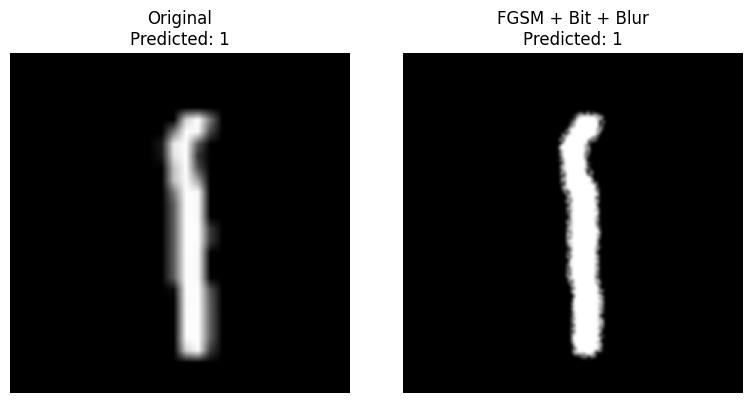

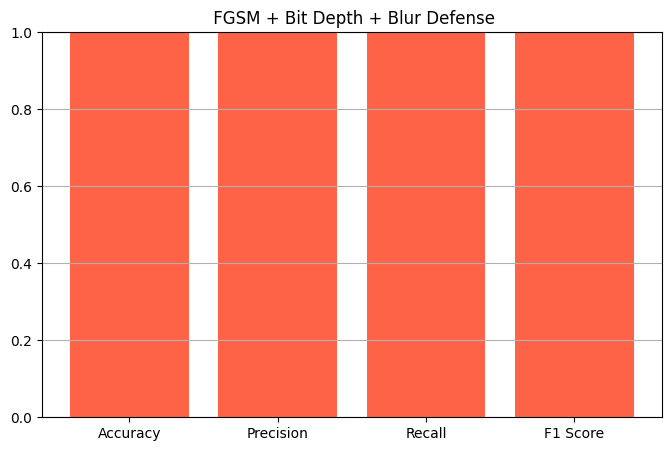

In [10]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import cv2
import numpy as np

# ============ 1. تحميل النموذج ============
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = models.resnet18(weights=None)
model.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
model.fc = nn.Linear(model.fc.in_features, 10)
model = model.to(device)

model.load_state_dict(torch.load("resnet_mnist.pth", map_location=device))
model.eval()

# ============ 2. تحميل بيانات MNIST ============
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1, shuffle=True)

# ============ 3. الدوال: FGSM + Bit + Blur ============
def fgsm_attack(image, epsilon, gradient):
    return torch.clamp(image + epsilon * gradient.sign(), -1, 1)

def bit_depth(image, levels=2):
    x = (image + 1) / 2
    x_quant = torch.round(x * (levels - 1)) / (levels - 1)
    return x_quant * 2 - 1

def gaussian_blur(image_tensor, kernel_size=5):
    img = image_tensor.squeeze().detach().cpu().numpy()
    img = (img + 1) / 2 * 255
    img = img.astype(np.uint8)
    blurred = cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)
    blurred = (blurred.astype(np.float32) / 255) * 2 - 1
    return torch.tensor(blurred).unsqueeze(0).to(device)

# ============ 4. الهجوم + الدفاع ============
epsilon = 0.25
true_labels, adv_preds = [], []
original_img, defended_img = None, None
original_pred, defended_pred = None, None

for i, (image, label) in enumerate(test_loader):
    image, label = image.to(device), label.to(device)
    image.requires_grad = True

    output = model(image)
    original_pred = output.max(1)[1].item()
    if original_pred != label.item():
        continue

    loss = nn.CrossEntropyLoss()(output, label)
    model.zero_grad()
    loss.backward()
    grad = image.grad.data

    x_adv = fgsm_attack(image, epsilon, grad)
    x_defended = bit_depth(x_adv, levels=2)
    x_defended = gaussian_blur(x_defended)

    pred = model(x_defended.unsqueeze(0)).max(1)[1].item()
    defended_pred = pred

    adv_preds.append(pred)
    true_labels.append(label.item())

    if original_img is None:
        original_img = image.squeeze().detach().cpu().numpy()
        defended_img = x_defended.squeeze().detach().cpu().numpy()

    if len(adv_preds) >= 100:
        break

# ============ 5. التقييم ============
acc = accuracy_score(true_labels, adv_preds)
prec = precision_score(true_labels, adv_preds, average='macro')
rec = recall_score(true_labels, adv_preds, average='macro')
f1 = f1_score(true_labels, adv_preds, average='macro')

print("\n FGSM + Bit Depth + Blur Defense:")
print(f" Accuracy:  {acc:.4f}")
print(f" Precision: {prec:.4f}")
print(f" Recall:    {rec:.4f}")
print(f" F1 Score:  {f1:.4f}")
print(f" Prediction Before: {original_pred}, After Defense: {defended_pred}")

# ============ 6. عرض الصور ============
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].imshow(original_img, cmap="gray")
axs[0].set_title(f"Original\nPredicted: {original_pred}")
axs[0].axis("off")

axs[1].imshow(defended_img, cmap="gray")
axs[1].set_title(f"FGSM + Bit + Blur\nPredicted: {defended_pred}")
axs[1].axis("off")

plt.tight_layout()
plt.show()

# ============ 7. رسم الأداء ============
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [acc, prec, rec, f1]

plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color='tomato')
plt.title(" FGSM + Bit Depth + Blur Defense")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()



# FGSM adversarial **training**+**noise**


 Evaluation of FGSM + AdvTraining + Gaussian Noise:
 Accuracy:  1.0000
 Precision: 1.0000
 Recall:    1.0000
 F1 Score:  1.0000
 Prediction Before: 8, After Defense: 8


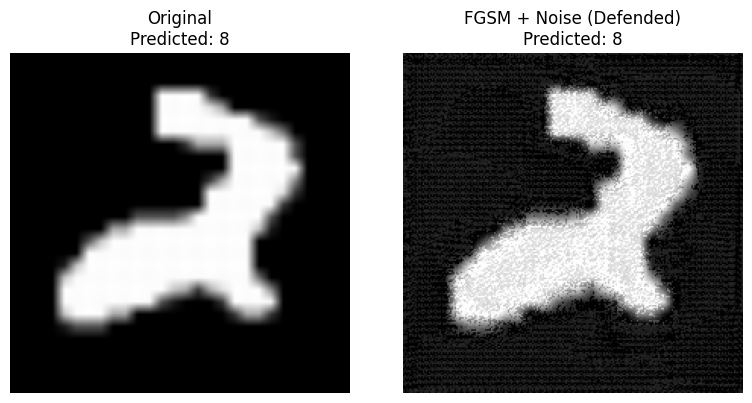

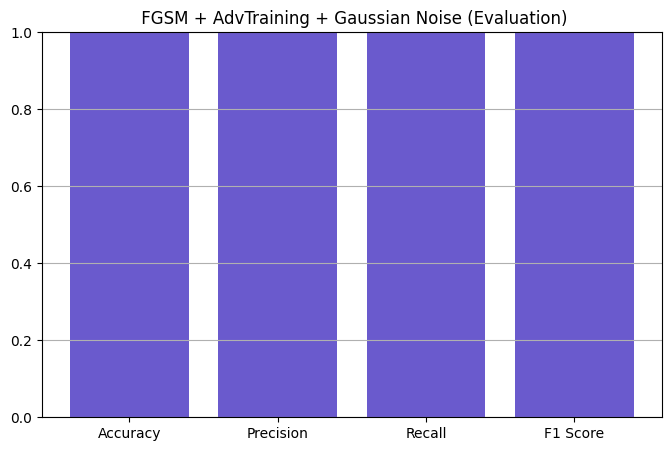

In [12]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# ============ 1. Load Model Trained with FGSM + Noise ============
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = models.resnet18(weights=None)
model.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
model.fc = nn.Linear(model.fc.in_features, 10)
model.load_state_dict(torch.load("resnet_advtrained.pth", map_location=device))
model = model.to(device)
model.eval()

# ============ 2. Load MNIST Test Data ============
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1, shuffle=True)

# ============ 3. FGSM + Gaussian Noise Functions ============
def fgsm_attack(image, epsilon, grad):
    return torch.clamp(image + epsilon * grad.sign(), -1, 1)

def add_gaussian_noise(image, std=0.05):
    noise = torch.randn_like(image) * std
    return torch.clamp(image + noise, -1, 1)

# ============ 4. Evaluation ============
epsilon = 0.25
true_labels, adv_preds = [], []
original_img, defended_img = None, None
original_pred, defended_pred = None, None

for i, (image, label) in enumerate(test_loader):
    image, label = image.to(device), label.to(device)
    image.requires_grad = True

    # Prediction Before Attack
    output = model(image)
    original_pred = output.max(1)[1].item()
    if original_pred != label.item():
        continue

    # FGSM Attack + Noise
    loss = nn.CrossEntropyLoss()(output, label)
    model.zero_grad()
    loss.backward()
    grad = image.grad.data

    adv_image = fgsm_attack(image, epsilon, grad)
    defended_image = add_gaussian_noise(adv_image)

    # Prediction After Attack + Noise
    output_def = model(defended_image)
    defended_pred = output_def.max(1)[1].item()

    adv_preds.append(defended_pred)
    true_labels.append(label.item())

    if original_img is None:
        original_img = image.squeeze().detach().cpu().numpy()
        defended_img = defended_image.squeeze().detach().cpu().numpy()

    if len(adv_preds) >= 100:
        break

# ============ 5. Metrics ============
acc = accuracy_score(true_labels, adv_preds)
prec = precision_score(true_labels, adv_preds, average='macro', zero_division=0)
rec = recall_score(true_labels, adv_preds, average='macro', zero_division=0)
f1 = f1_score(true_labels, adv_preds, average='macro', zero_division=0)

print("\n Evaluation of FGSM + AdvTraining + Gaussian Noise:")
print(f" Accuracy:  {acc:.4f}")
print(f" Precision: {prec:.4f}")
print(f" Recall:    {rec:.4f}")
print(f" F1 Score:  {f1:.4f}")
print(f" Prediction Before: {original_pred}, After Defense: {defended_pred}")

# ============ 6. Show Images ============
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].imshow(original_img, cmap="gray")
axs[0].set_title(f"Original\nPredicted: {original_pred}")
axs[0].axis("off")

axs[1].imshow(defended_img, cmap="gray")
axs[1].set_title(f"FGSM + Noise (Defended)\nPredicted: {defended_pred}")
axs[1].axis("off")

plt.tight_layout()
plt.show()

# ============ 7. Performance Chart ============
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [acc, prec, rec, f1]

plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color='slateblue')
plt.title(" FGSM + AdvTraining + Gaussian Noise (Evaluation)")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()


## fgsm_eval_adv trained

✅ Loaded adversarially trained model.

 Evaluation of Adversarially Trained Model against FGSM:
 Accuracy:  1.0000
 Precision: 1.0000
 Recall:    1.0000
 F1 Score:  1.0000
 Prediction Before: 6, After FGSM: 6


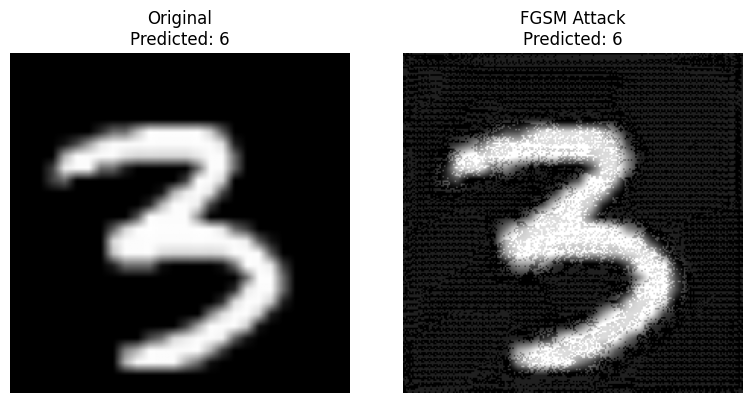

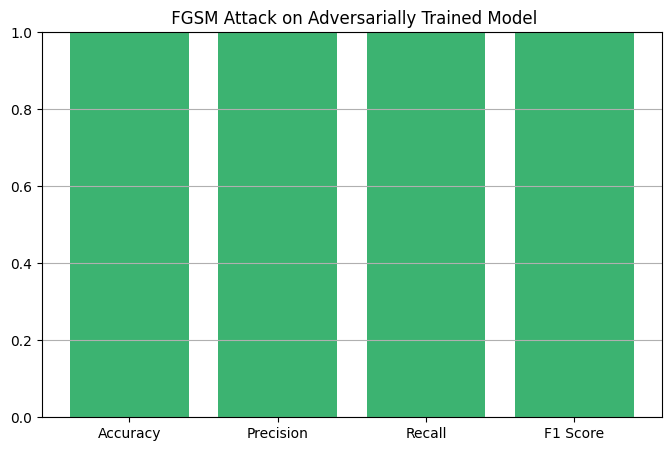

In [15]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# ============ 1. Preparing the model ============
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = models.resnet18(weights=None)
model.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
model.fc = nn.Linear(model.fc.in_features, 10)
model = model.to(device)

# Load adversarially trained model
model.load_state_dict(torch.load("resnet_advtrained.pth", map_location=device))
model.eval()
print("✅ Loaded adversarially trained model.")

# ============ 2. Load MNIST test data ============
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1, shuffle=True)

# ============ 3. FGSM Attack ============
def fgsm_attack(image, epsilon, gradient):
    return torch.clamp(image + epsilon * gradient.sign(), -1, 1)

epsilon = 0.25
adv_preds, true_labels = [], []
original_img, adv_img = None, None
original_pred, adv_pred = None, None

for i, (image, label) in enumerate(test_loader):
    image, label = image.to(device), label.to(device)
    image.requires_grad = True

    # Prediction before attack
    output = model(image)
    original_pred = output.max(1)[1].item()
    if original_pred != label.item():
        continue

    loss = nn.CrossEntropyLoss()(output, label)
    model.zero_grad()
    loss.backward()
    gradient = image.grad.data

    x_adv = fgsm_attack(image, epsilon, gradient)
    output_adv = model(x_adv)
    adv_pred = output_adv.max(1)[1].item()

    adv_preds.append(adv_pred)
    true_labels.append(label.item())

    if original_img is None:
        original_img = image.squeeze().detach().cpu().numpy()
        adv_img = x_adv.squeeze().detach().cpu().numpy()

    if len(adv_preds) >= 100:
        break

# ============ 4. Evaluation ============
acc = accuracy_score(true_labels, adv_preds)
prec = precision_score(true_labels, adv_preds, average='macro')
rec = recall_score(true_labels, adv_preds, average='macro')
f1 = f1_score(true_labels, adv_preds, average='macro')

print("\n Evaluation of Adversarially Trained Model against FGSM:")
print(f" Accuracy:  {acc:.4f}")
print(f" Precision: {prec:.4f}")
print(f" Recall:    {rec:.4f}")
print(f" F1 Score:  {f1:.4f}")
print(f" Prediction Before: {original_pred}, After FGSM: {adv_pred}")

# ============ 5. View Images ============
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].imshow(original_img, cmap="gray")
axs[0].set_title(f"Original\nPredicted: {original_pred}")
axs[0].axis("off")
axs[1].imshow(adv_img, cmap="gray")
axs[1].set_title(f"FGSM Attack\nPredicted: {adv_pred}")
axs[1].axis("off")
plt.tight_layout()
plt.show()

# ============ 6. Bar Chart ============
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [acc, prec, rec, f1]

plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color='mediumseagreen')
plt.title(" FGSM Attack on Adversarially Trained Model")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()
